In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.externals import joblib
import pickle

pd.pandas.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings('ignore')

C:\Users\Nitro 5\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
validation_set = pd.read_csv('Dataset/validation_set.csv')
validation_set.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0.00,0.0,2.32,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.000,0.854,0.0,0.000,0.000,0.000,1.823,8,31,0
1,0.51,0.0,0.00,0.0,0.17,0.17,0.0,0.0,0.34,0.17,0.0,2.07,0.0,0.00,0.0,0.17,0.0,0.00,2.24,0.0,1.03,0.0,0.0,0.0,0.34,0.69,0.17,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.34,0.0,0.00,0.0,0.0,0.0,0.17,0.34,0.0,0.0,0.0,0.00,0.466,0.248,0.0,0.000,0.000,0.062,2.926,48,319,0
2,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,2.04,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.02,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.000,0.176,0.0,0.176,0.352,0.000,3.857,25,81,1
3,0.44,0.0,0.88,0.0,0.44,1.32,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.44,1.76,0.0,2.20,0.0,2.2,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.222,0.000,0.0,0.444,0.370,0.000,2.413,16,140,1
4,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,1.75,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.87,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,1.75,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.87,0.000,0.000,0.0,0.000,0.000,0.000,1.795,11,79,0


In [3]:
y_validation = validation_set.Y
X_validation = validation_set.drop('Y',axis='columns')

#### Min Max Normalization on Validation Set (using the scaler used on Train Set) 

In [4]:
scaler_filename = "Models/MinMaxScaler.save"
scaler = joblib.load(scaler_filename)

features = X_validation.columns

X_validation = pd.DataFrame(scaler.transform(X_validation[features]),columns=features)
X_validation.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,0.000000,0.0,0.534562,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0000,0.000000,0.0000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000,0.0,0.0,0.0,0.000000,0.000000,0.377375,0.0,0.000000,0.000000,0.000000,0.007735,0.008323,0.007998
1,0.219828,0.0,0.000000,0.0,0.032319,0.080952,0.0,0.0,0.160377,0.032319,0.0,0.320930,0.0,0.000000,0.0,0.026074,0.0,0.000000,0.156863,0.0,0.108193,0.0,0.000000,0.0,0.0272,0.103604,0.0068,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.102102,0.0,0.000000,0.0,0.0,0.0,0.098266,0.068,0.0,0.0,0.0,0.000000,0.330966,0.109589,0.0,0.000000,0.000000,0.024632,0.018102,0.055886,0.084777
2,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.990291,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0000,0.000000,0.0000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000,0.0,0.0,0.0,0.000000,0.000000,0.077773,0.0,0.027556,0.172718,0.000000,0.026852,0.028537,0.021328
3,0.189655,0.0,0.202765,0.0,0.083650,0.628571,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.105769,0.123249,0.0,0.231092,0.0,0.849421,0.0,0.0000,0.000000,0.0000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000,0.0,0.0,0.0,0.000000,0.157670,0.000000,0.0,0.069516,0.181551,0.000000,0.013280,0.017836,0.037057
4,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.271318,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0000,0.000000,0.0000,0.0,0.235135,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.605536,0.0,0.0,0.0,0.000000,0.000,0.0,0.0,0.0,0.339844,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.007472,0.011891,0.020794


####  Feature Selection in Validation Set using the features selected during training  

In [5]:
X = pd.read_csv('Dataset/train_set_after_feature_selection.csv')
X = X.drop('Y',axis='columns')
selected_features_in_training_set = X.columns.values
X_validation = X_validation[selected_features_in_training_set]
X_validation.shape

(782, 27)

#### Checking Model Performance 

In [6]:
with open('Models/Initial_model_for_validation_set_Random_Forest','rb') as f:
    model = pickle.load(f)
print ("Accuracy is ", round(model.score(X_validation,y_validation)*100,3))

Accuracy is  93.734


In [7]:
y_predicted = model.predict(X_validation)
print (classification_report(y_validation, y_predicted))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       475
           1       0.93      0.91      0.92       307

    accuracy                           0.94       782
   macro avg       0.94      0.93      0.93       782
weighted avg       0.94      0.94      0.94       782



(2.0, 0.0)

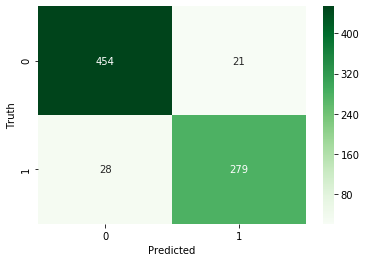

In [8]:
cm = confusion_matrix(y_validation, y_predicted)
ax = sns.heatmap(cm,annot=True,fmt="d",cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Truth')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

The model is doing quite well. 

It is doing better for Class 0. That's quite expected as the the number of instances belonging to class zero is higher.